# 這份程式碼負責的是MICE Imputation和LGBMRegressor、Neural Network

In [7]:
import numpy as np
import pandas as pd

# Data imputation

In [8]:
data1_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data1/train.csv',header=None)
data1_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data1/test.csv',header=None)
data2_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data2/train.csv',header=None)
data2_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data2/test.csv',header=None)
data3_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data3/train.csv',header=None)
data3_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data3/test.csv',header=None)
data4_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data4/train.csv',header=None)
data4_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data4/test.csv',header=None)
data5_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data5/train.csv',header=None)
data5_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data5/test.csv',header=None)
data6_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data6/train.csv',header=None)
data6_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data6/test.csv',header=None)
data7_train=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data7/train.csv',header=None)
data7_test=pd.read_csv('C:/Homework/巨量資料/HW3/hw3_data/data7/test.csv',header=None)

# EDA

In [9]:
import missingno as msno

In [10]:
%matplotlib inline

<AxesSubplot: >

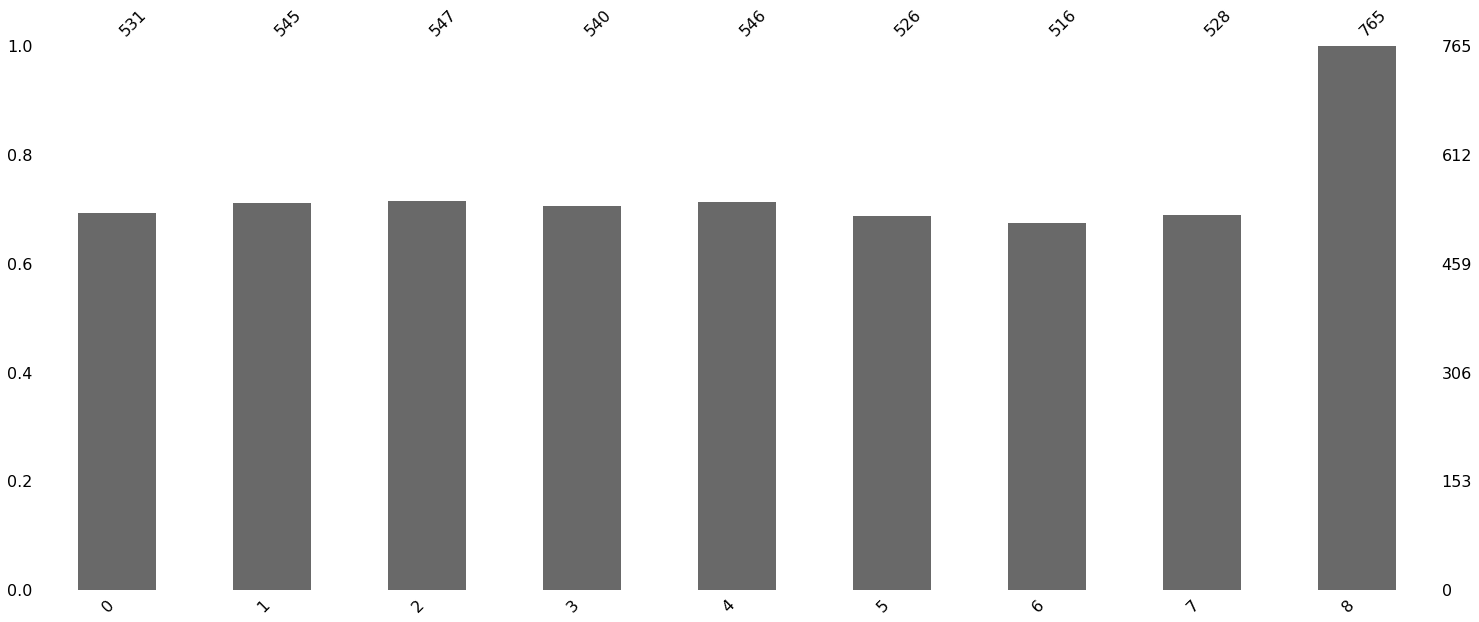

In [11]:
msno.bar(data1_train)

<AxesSubplot: >

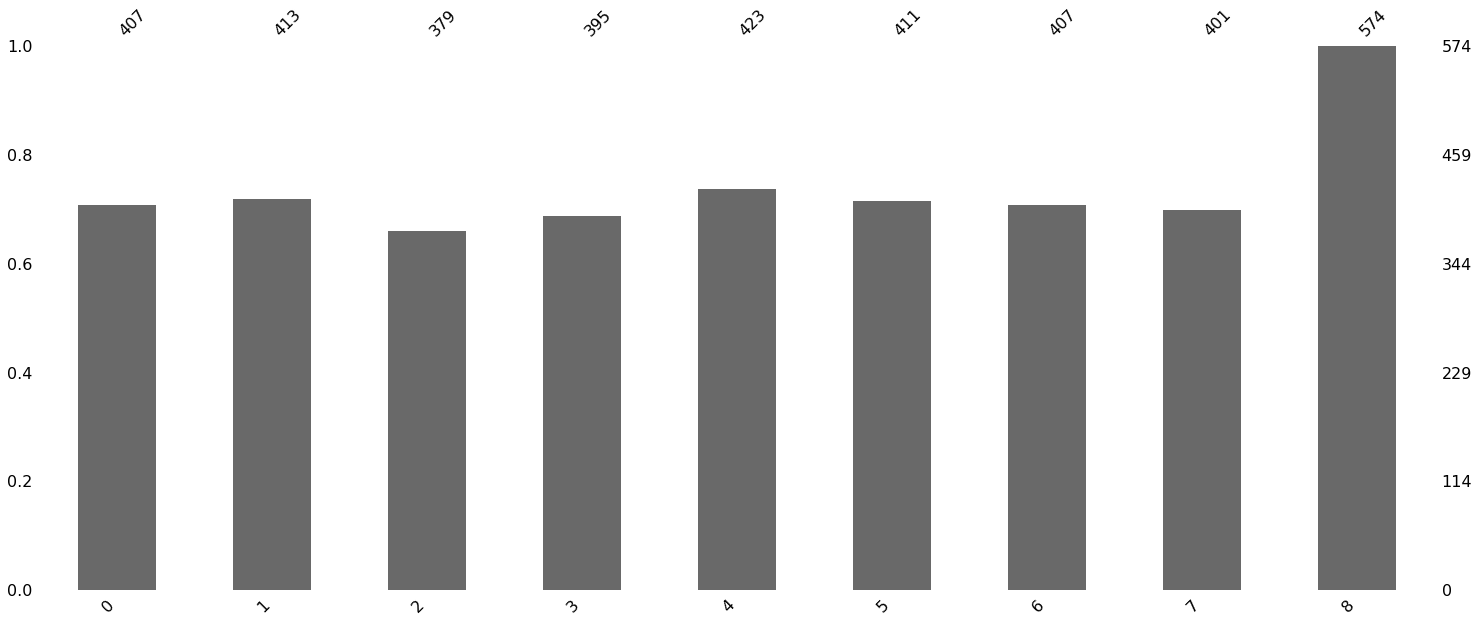

In [12]:
msno.bar(data2_train)

<AxesSubplot: >

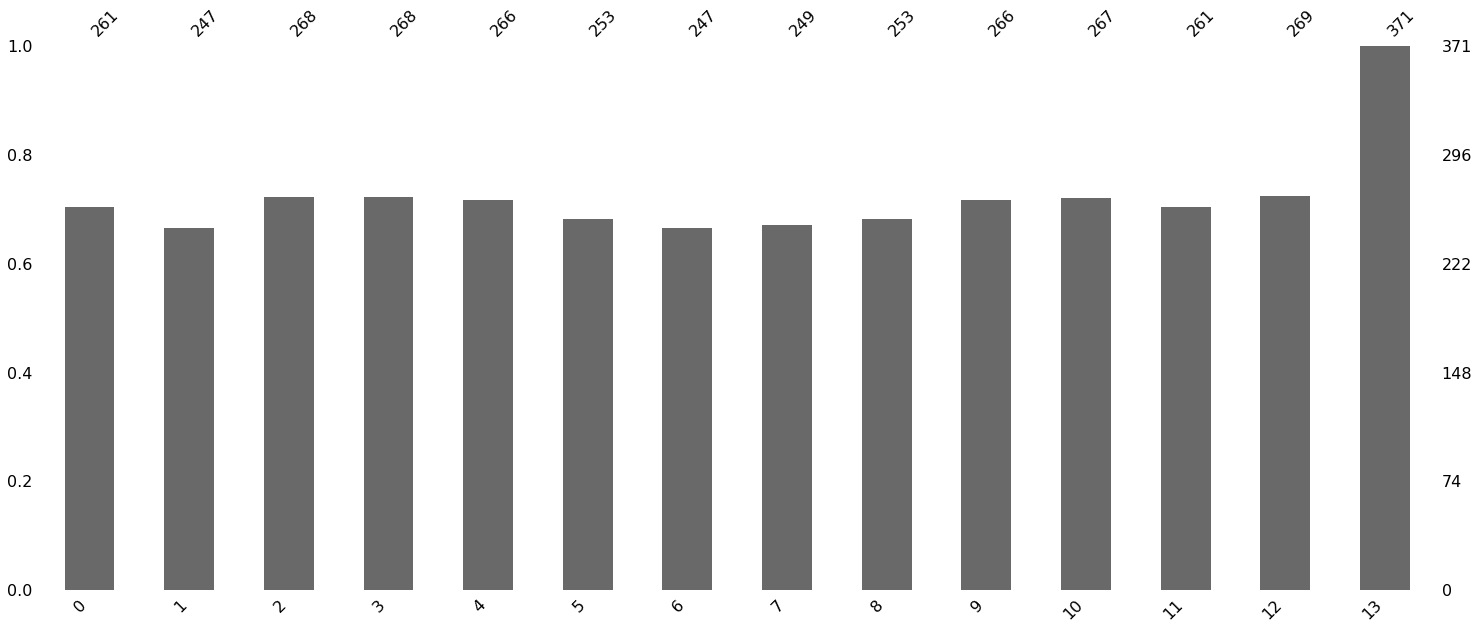

In [13]:
msno.bar(data3_train)

<AxesSubplot: >

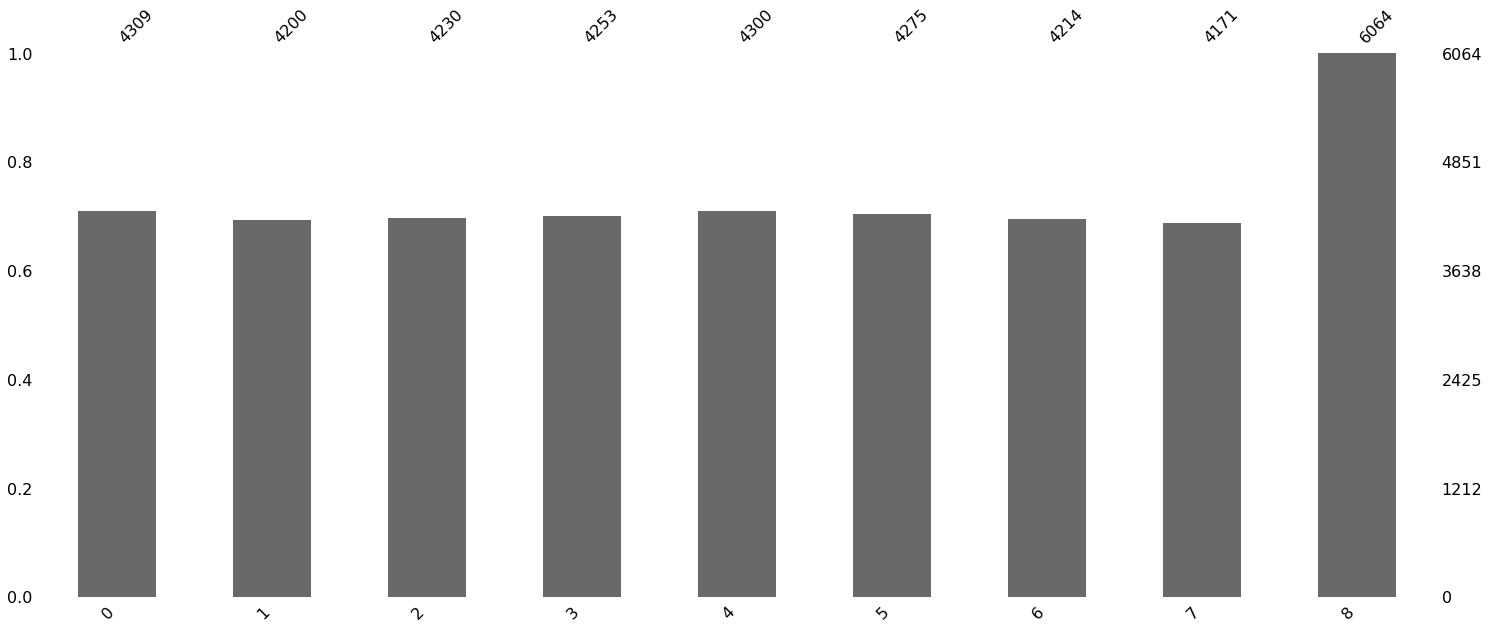

In [17]:
msno.bar(data4_train)

<AxesSubplot: >

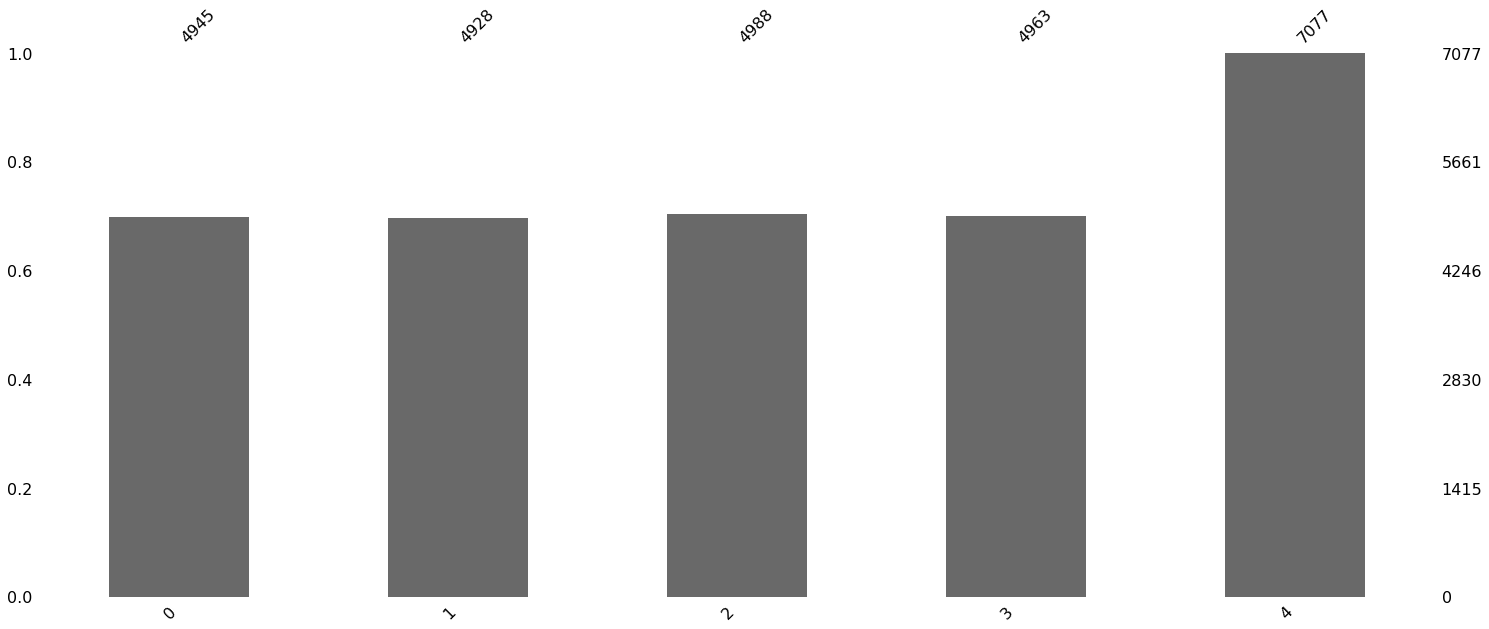

In [18]:
msno.bar(data5_train)

<AxesSubplot: >

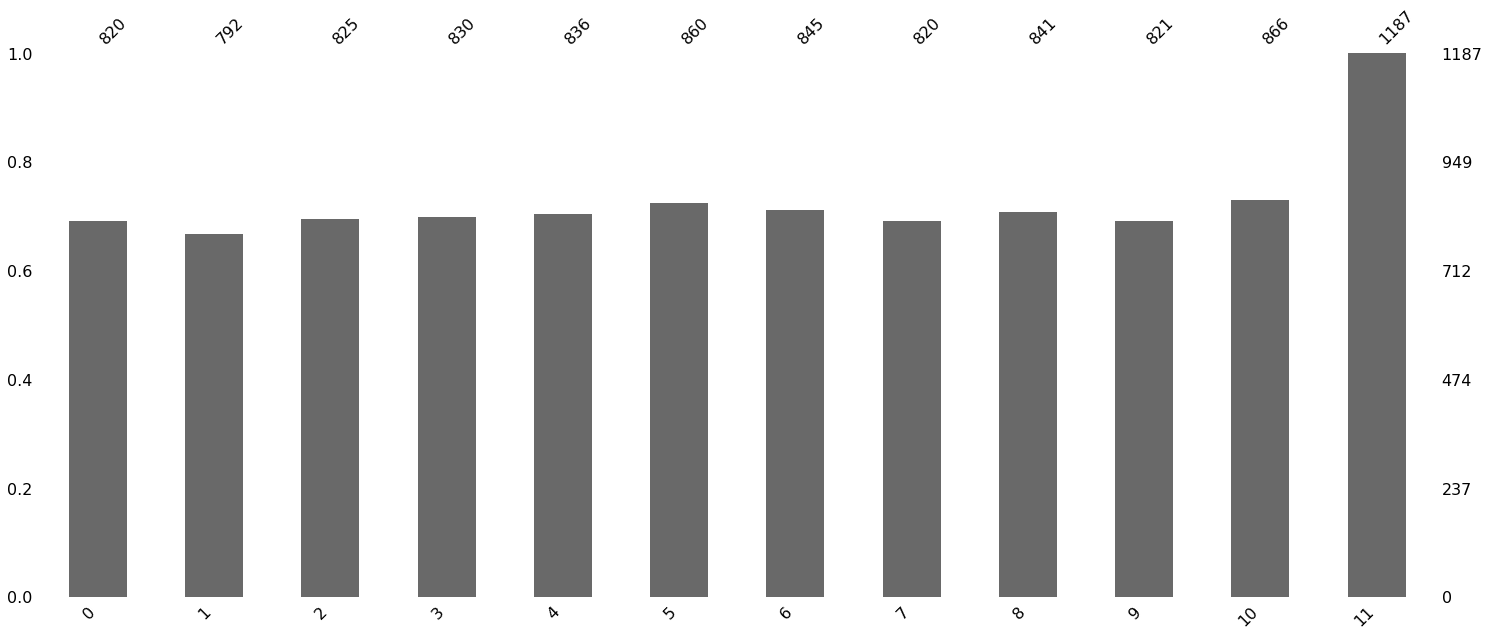

In [19]:
msno.bar(data6_train)

<AxesSubplot: >

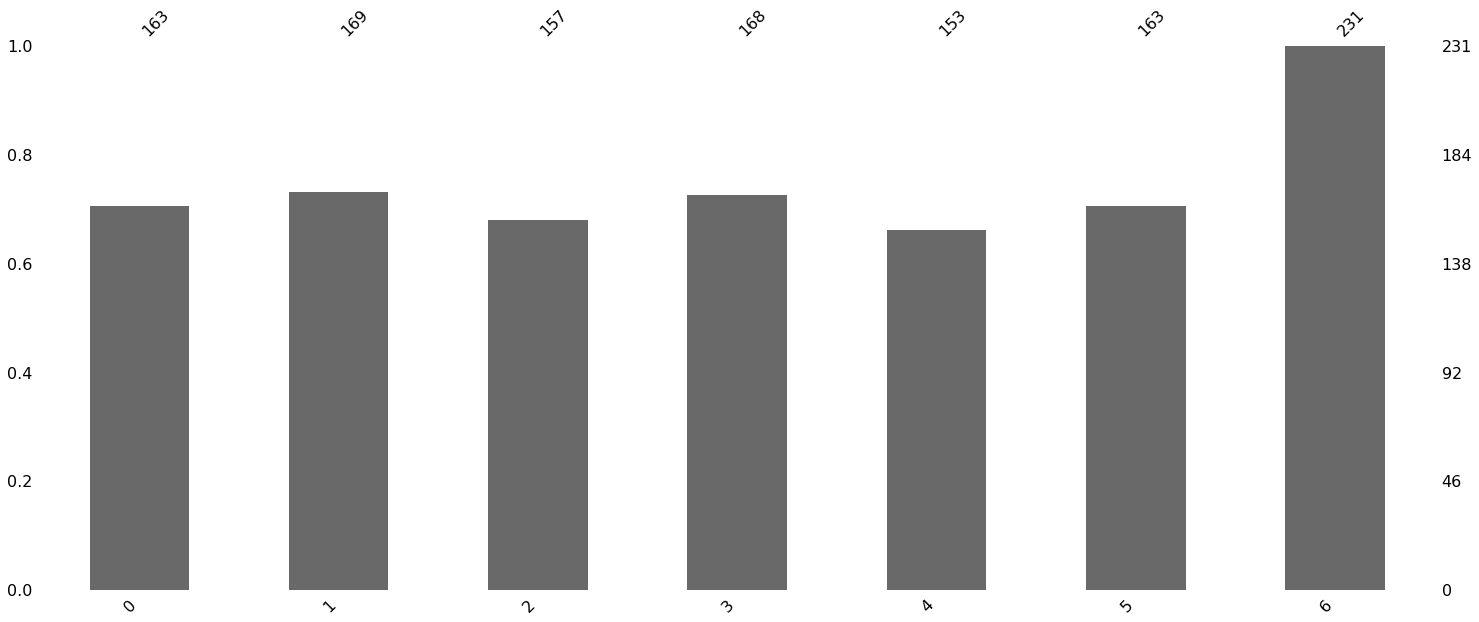

In [20]:
msno.bar(data7_train)

# MICE

In [14]:
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

## Data1

In [15]:
data1_test.iloc[:len(data1_test)]

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,9.0,825.0,805.0,28.0,0.0
1,525.0,NaN,NaN,189.0,0.0,NaN,613.0,NaN,0.0
2,NaN,NaN,NaN,NaN,9.0,825.0,805.0,28.0,0.0
3,230.0,NaN,NaN,195.5,4.6,1029.4,758.6,56.0,0.0
4,184.0,NaN,190.0,NaN,6.0,NaN,623.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
304,332.5,142.5,0.0,228.0,0.0,932.0,594.0,180.0,0.0
305,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28.0,0.0
306,NaN,0.0,0.0,NaN,0.0,1125.0,613.0,180.0,0.0
307,116.0,173.0,NaN,192.0,NaN,NaN,NaN,NaN,0.0


In [16]:
imputer = IterativeImputer(max_iter=100)
# imputing the missing value with mice imputer
X=data1_train.iloc[:,:-1]
y=data1_train.iloc[:,-1:]

train_test=pd.concat([X,data1_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data1_train)]

test=train_test_im[len(data1_train):]
test.index=range(len(test))

In [17]:
#Scale train
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [18]:
#Train model
LGBM = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=550)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(learning_rate=0.01, n_estimators=550)

In [19]:
#Scale test
test1_sc=sc.transform(test)
test1_sc

array([[ 0.28827689,  0.6699251 ,  0.03267716, ..., -2.0974849 ,
         0.42219044, -0.31596422],
       [ 2.58390824, -0.29942109, -1.31956058, ...,  1.06045417,
        -2.26380171,  0.27079813],
       [ 0.28827689,  0.6699251 ,  0.03267716, ..., -2.0974849 ,
         0.42219044, -0.31596422],
       ...,
       [ 1.15715473, -0.93235304, -0.90291969, ...,  2.15764986,
        -2.26380171,  2.29889023],
       [-1.6837128 ,  1.23659826,  0.20286385, ..., -0.05535921,
        -0.04087758,  0.07559205],
       [ 0.11098358,  1.47480678, -0.90291969, ..., -0.57982017,
        -0.79769766,  1.26627738]])

In [20]:
#Prediction
pred_1=LGBM.predict(test1_sc)
pred_1=pd.DataFrame(pred_1)
predict_1= pd.concat([test, pred_1], axis=1,ignore_index=True)
predict_1
predict_1.to_csv('C:/Users/user/Downloads/predict_1_combine_1.csv',index=False,header=False)

## Data2

In [195]:
imputer = IterativeImputer(max_iter=100)

X=data2_train.iloc[:,:-1]
y=data2_train.iloc[:,-1:]

train_test=pd.concat([X,data2_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data2_train)]

test=train_test_im[len(data2_train):]
test.index=range(len(test))

In [196]:
#Scale train
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [197]:
#Train model
LGBM = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=3000)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.01, n_estimators=3000)

In [198]:
#Scale test
test2_sc=sc.transform(test)
test2_sc

array([[-1.1877551 ,  1.29325728,  0.60657979, ..., -0.00247512,
         1.31345438,  0.07336523],
       [ 1.29949658, -1.23730122,  0.02778283, ...,  0.45123422,
         1.31345438,  0.07336523],
       [-0.51811042,  0.44565514, -1.19934686, ..., -0.5907251 ,
        -0.20492423,  0.07336523],
       ...,
       [ 1.29949658, -1.24832571,  0.00460424, ...,  0.45123422,
        -1.10929139, -0.5045233 ],
       [ 1.35059984, -1.24954916,  0.00460424, ..., -1.63268443,
        -0.98650019,  0.8464944 ],
       [ 1.08849697, -0.88514217,  1.3812585 , ..., -0.5907251 ,
        -1.10929139,  0.8464944 ]])

In [199]:
#Predict
pred_2=LGBM.predict(test2_sc)
pred_2=pd.DataFrame(pred_2)
predict_2= pd.concat([test, pred_2], axis=1,ignore_index=True)
predict_2
predict_2.to_csv('C:/Users/user/Downloads/predict_2_combine.csv',index=False,header=False)

## Data3

In [200]:
# imputing the missing value with mice imputer
imputer = IterativeImputer(max_iter=200)
X=data3_train.iloc[:,:-1]
y=data3_train.iloc[:,-1:]

train_test=pd.concat([X,data3_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data3_train)]

test=train_test_im[len(data3_train):]
test.index=range(len(test))

In [201]:
#Scale train
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [202]:
#Train model
LGBM = lgb.LGBMRegressor(learning_rate=0.001,n_estimators=3000)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.001, n_estimators=3000)

In [203]:
#Scale test
test3_sc=sc.transform(test)
test3_sc

array([[-0.33450308, -0.47195355,  1.65975741, ...,  1.33097603,
        -0.15047261, -0.32982047],
       [-0.27875824, -0.47195355, -0.444612  , ...,  1.23073641,
         0.10132606,  0.51112534],
       [ 1.81608276, -0.47195355,  1.07971667, ...,  0.8297779 ,
        -1.03866713,  2.84934098],
       ...,
       [-0.35633891, -0.47195355, -1.31390787, ..., -0.37309762,
         0.54789209, -1.1062058 ],
       [-0.32452346, -0.47195355, -0.56092623, ...,  0.52905902,
         0.46972106, -0.69503915],
       [-0.36067788,  3.33295413, -1.46542247, ...,  0.28644941,
         0.29860652, -1.19740441]])

In [204]:
#Predict
pred_3=LGBM.predict(test3_sc)
pred_3=pd.DataFrame(pred_3)
predict_3= pd.concat([test, pred_3], axis=1)

predict_3.to_csv('C:/Users/user/Downloads/predict_3_combine.csv',index=False,header=False)

## Data4

In [170]:
# imputing the missing value with mice imputer
imputer = IterativeImputer(max_iter=100)
X=data4_train.iloc[:,:-1]
y=data4_train.iloc[:,-1:]

train_test=pd.concat([X,data4_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data4_train)]

test=train_test_im[len(data4_train):]
test.index=range(len(test))

In [171]:
#Sale train
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [172]:
#Train model
LGBM = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=550)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.01, n_estimators=550)

In [173]:
#Scale test
test4_sc=sc.transform(test)
test4_sc

array([[-1.78329526e+00, -1.80752220e-02, -2.85909144e-01, ...,
        -1.64837387e-03,  1.06993490e-01,  1.44491210e-02],
       [ 1.47126475e-03, -1.22716109e+00,  1.24646999e+00, ...,
        -4.41242906e-01, -4.23876992e-02,  9.57383362e-01],
       [ 7.03008059e-01, -6.91230503e-01,  1.52795193e-02, ...,
        -7.53510497e-01,  6.35357231e-01, -9.96695036e-03],
       ...,
       [ 4.17362684e-01, -1.99497650e-01, -1.53916639e+00, ...,
        -1.36536675e+00,  1.70327886e+00,  1.59297590e-02],
       [ 3.00102010e-02, -6.84614076e-01,  1.43986158e+00, ...,
         5.96403065e-04, -5.75287222e-02, -7.71538592e-01],
       [-1.40823787e-02, -1.48877461e+00,  1.51190161e+00, ...,
        -1.37660246e-03, -1.68946957e+00,  2.45740466e-02]])

In [174]:
#Prediction
pred_4=LGBM.predict(test4_sc)
pred_4=pd.DataFrame(pred_4)
predict_4= pd.concat([test, pred_4], axis=1)
predict_4
predict_4.to_csv('C:/Users/user/Downloads/predict_4_combine.csv',index=False,header=False)

## Data5

In [175]:
# imputing the missing value with mice imputer
imputer = IterativeImputer(max_iter=100)
X=data5_train.iloc[:,:-1]
y=data5_train.iloc[:,-1:]
train_test=pd.concat([X,data5_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data5_train)]

test=train_test_im[len(data5_train):]
test.index=range(len(test))

In [176]:
# Scale train data
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [177]:
#Train model
LGBM = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=550)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.01, n_estimators=550)

In [178]:
#Scale test
test5_sc=sc.transform(test)
test5_sc

array([[-1.17817382, -1.22343516,  0.92956761,  0.11491121],
       [ 0.59871591,  0.50117794,  1.06594549, -1.10938814],
       [-1.12951096, -1.1401482 ,  1.89011433, -0.11451194],
       ...,
       [-0.61924606, -1.29481922,  1.30592658, -1.97671565],
       [-1.68287724, -1.0810538 ,  0.86394583,  1.72052926],
       [-0.44405975, -1.18675787, -1.14610134,  0.53532373]])

In [179]:
pred_5=LGBM.predict(test5_sc)
pred_5=pd.DataFrame(pred_5)
predict_5= pd.concat([test, pred_5], axis=1)
predict_5
predict_5.to_csv('C:/Users/user/Downloads/predict_5_combine.csv',index=False,header=False)

## Data6

In [180]:
# imputing the missing value with mice imputer
imputer = IterativeImputer(max_iter=100)
X=data6_train.iloc[:,:-1]
y=data6_train.iloc[:,-1:]

train_test=pd.concat([X,data6_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data6_train)]

test=train_test_im[len(data6_train):]
test.index=range(len(test))

In [181]:
#Scale train
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [182]:
LGBM = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=550)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.01, n_estimators=550)

In [183]:
#Scale test
test6_sc=sc.transform(test)
test6_sc

array([[-1.05185172, -0.61494244, -0.93529052, ...,  0.58665961,
         0.14467172, -0.04830377],
       [-0.62824355,  0.38766587, -0.04312437, ..., -0.21790511,
         0.45122949, -0.84118416],
       [-0.33271477,  0.68255067, -0.43330927, ...,  0.39605543,
        -0.53046648, -0.34263447],
       ...,
       [ 0.37654908, -0.3790346 ,  0.9540025 , ...,  0.05496624,
         0.84073704,  3.48366467],
       [-0.33271477,  0.07755127,  0.01314211, ...,  0.19140192,
        -0.29827895,  1.12901905],
       [ 2.32704422, -0.79187331,  1.89864901, ..., -1.03651918,
        -1.05762294, -0.87826107]])

In [184]:
#Predict
pred_6=LGBM.predict(test6_sc)
pred_6=pd.DataFrame(pred_6)
predict_6= pd.concat([test, pred_6], axis=1)
predict_6
predict_6.to_csv('C:/Users/user/Downloads/predict_6_combine.csv',index=False,header=False)

## Data7

In [185]:
# imputing the missing value with mice imputer
imputer = IterativeImputer(max_iter=100)
X=data7_train.iloc[:,:-1]
y=data7_train.iloc[:,-1:]

train_test=pd.concat([X,data7_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data7_train)]

test=train_test_im[len(data7_train):]
test.index=range(len(test))

In [186]:
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

In [187]:
LGBM = lgb.LGBMRegressor(learning_rate=0.001,n_estimators=550)
LGBM.fit(X_train_impute,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.001, n_estimators=550)

In [188]:
#test
test7_sc=sc.transform(test)
test7_sc

array([[ 5.63630696e-02, -1.70506387e+00,  1.36216629e+00,
        -3.92085145e-01,  1.24476822e+00,  1.08725994e+00],
       [ 1.84606959e-02, -1.07204656e+00, -1.78303834e+00,
        -2.00719313e+00, -2.37404388e-01,  1.82742588e-01],
       [ 1.92063514e+00,  1.64712243e+00,  1.42214492e-02,
         6.17357345e-01, -2.37404388e-01, -5.42377211e-02],
       [-2.46922379e-02,  4.02024659e-01, -1.70134471e+00,
         1.03459350e-01, -1.84309138e+00,  4.19722897e-01],
       [ 5.63630696e-02, -1.70506387e+00, -6.74721776e-02,
        -4.10438645e-01, -9.86081766e-02,  7.92905833e-03],
       [ 5.63630696e-02,  1.14694405e-01,  1.42214492e-02,
         1.58519850e-01, -1.55061466e-01,  4.20193643e-01],
       [-2.13213023e+00, -2.89707228e-02,  7.17226108e-02,
         6.67523506e-02, -7.13162102e-02,  1.36764413e+00],
       [ 5.63630696e-02, -1.70506387e+00,  1.36216629e+00,
        -3.92085145e-01,  1.24476822e+00,  1.08725994e+00],
       [-2.13213023e+00,  1.64712243e+00,  1.422

In [189]:
pred_7=LGBM.predict(test7_sc)
pred_7=pd.DataFrame(pred_7)
predict_7= pd.concat([test, pred_7], axis=1)
predict_7
predict_7.to_csv('C:/Users/user/Downloads/predict_7_combine.csv',index=False,header=False)

# Neural Network

In [3]:
import torch
import torch.nn as nn

## Data1

In [4]:
imputer = IterativeImputer(max_iter=100)
# imputing the missing value with mice imputer
X=data1_train.iloc[:,:-1]
y=data1_train.iloc[:,-1:]

train_test=pd.concat([X,data1_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data1_train)]

test=train_test_im[len(data1_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)
test1_sc=sc.transform(test)
test1_sc

NameError: name 'IterativeImputer' is not defined

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [60]:
model = Sequential()
model.add(Dense(24, input_shape=(8,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
#sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')



In [61]:
model.fit(X_train_impute, y, epochs=200, batch_size=5)

Epoch 1/200
153/153 [==============================] - 0s 855us/step - loss: 1423.8259
Epoch 2/200
153/153 [==============================] - 0s 855us/step - loss: 592.6016
Epoch 3/200
153/153 [==============================] - 0s 781us/step - loss: 225.8982
Epoch 4/200
153/153 [==============================] - 0s 796us/step - loss: 205.9840
Epoch 5/200
153/153 [==============================] - 0s 835us/step - loss: 195.9950
Epoch 6/200
153/153 [==============================] - 0s 846us/step - loss: 187.7480
Epoch 7/200
153/153 [==============================] - 0s 765us/step - loss: 182.0626
Epoch 8/200
153/153 [==============================] - 0s 836us/step - loss: 176.4753
Epoch 9/200
153/153 [==============================] - 0s 785us/step - loss: 173.6786
Epoch 10/200
153/153 [==============================] - 0s 824us/step - loss: 171.8488
Epoch 11/200
153/153 [==============================] - 0s 778us/step - loss: 167.9163
Epoch 12/200
153/153 [=============================

Epoch 189/200
153/153 [==============================] - 0s 1ms/step - loss: 92.6580
Epoch 190/200
153/153 [==============================] - 0s 642us/step - loss: 93.6494
Epoch 191/200
153/153 [==============================] - 0s 856us/step - loss: 92.3075
Epoch 192/200
153/153 [==============================] - 0s 755us/step - loss: 92.5775
Epoch 193/200
153/153 [==============================] - 0s 761us/step - loss: 92.9791
Epoch 194/200
153/153 [==============================] - 0s 652us/step - loss: 92.6123
Epoch 195/200
153/153 [==============================] - 0s 719us/step - loss: 91.4476
Epoch 196/200
153/153 [==============================] - 0s 823us/step - loss: 91.5182
Epoch 197/200
153/153 [==============================] - 0s 600us/step - loss: 92.8072
Epoch 198/200
153/153 [==============================] - 0s 824us/step - loss: 90.8538
Epoch 199/200
153/153 [==============================] - 0s 701us/step - loss: 90.8107
Epoch 200/200
153/153 [======================

In [58]:
predictions = model.predict(test1_sc)

array([[46.27558 ],
       [51.75549 ],
       [46.27558 ],
       [32.385246],
       [23.86761 ],
       [29.786366],
       [50.126198],
       [23.969986],
       [51.57983 ],
       [47.680016],
       [47.71814 ],
       [34.006413],
       [21.928837],
       [46.276695],
       [44.146538],
       [58.513702],
       [55.519943],
       [51.598083],
       [46.070316],
       [26.88124 ],
       [57.66275 ],
       [37.642944],
       [27.728989],
       [33.85043 ],
       [21.961666],
       [41.13757 ],
       [52.716274],
       [22.996815],
       [54.36805 ],
       [39.4437  ],
       [14.804715],
       [24.923882],
       [21.89833 ],
       [25.59008 ],
       [55.886593],
       [35.24058 ],
       [31.32359 ],
       [47.32956 ],
       [40.64059 ],
       [52.26937 ],
       [54.71421 ],
       [40.990246],
       [59.313114],
       [30.79158 ],
       [24.124195],
       [35.56335 ],
       [37.832775],
       [43.70157 ],
       [40.54165 ],
       [44.8176  ],


In [59]:
pred_1=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_1], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_1_nn.csv',index=False,header=False)

## Data2

In [90]:
imputer = IterativeImputer(max_iter=100)

X=data2_train.iloc[:,:-1]
y=data2_train.iloc[:,-1:]
#train1_impute = imputer.fit_transform(data1_train)
#X_train, X_test, y_train, y_test = train_test_split(
#          X, y, test_size = 0.2, shuffle=True,random_state=5)
train_test=pd.concat([X,data2_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data2_train)]

test=train_test_im[len(data2_train):]
test.index=range(len(test))
sc=StandardScaler()
X_train_impute = sc.fit_transform(X)
test2_sc=sc.transform(test)
X_train_impute.size

4592

In [91]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))
#sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [93]:
model.fit(X_train_impute, y, epochs=300, batch_size=10)

Epoch 1/300
58/58 [==============================] - 0s 874us/step - loss: 7.8758
Epoch 2/300
58/58 [==============================] - 0s 781us/step - loss: 7.8601
Epoch 3/300
58/58 [==============================] - 0s 952us/step - loss: 7.8477
Epoch 4/300
58/58 [==============================] - 0s 842us/step - loss: 7.7357
Epoch 5/300
58/58 [==============================] - 0s 807us/step - loss: 7.8963
Epoch 6/300
58/58 [==============================] - 0s 1ms/step - loss: 7.7272
Epoch 7/300
58/58 [==============================] - 0s 932us/step - loss: 7.7594
Epoch 8/300
58/58 [==============================] - 0s 805us/step - loss: 7.7544
Epoch 9/300
58/58 [==============================] - 0s 836us/step - loss: 7.7379
Epoch 10/300
58/58 [==============================] - 0s 841us/step - loss: 7.7093
Epoch 11/300
58/58 [==============================] - 0s 827us/step - loss: 7.7057
Epoch 12/300
58/58 [==============================] - 0s 859us/step - loss: 7.6571
Epoch 13/300
58

Epoch 100/300
58/58 [==============================] - 0s 823us/step - loss: 6.0211
Epoch 101/300
58/58 [==============================] - 0s 815us/step - loss: 6.1857
Epoch 102/300
58/58 [==============================] - 0s 730us/step - loss: 6.4250
Epoch 103/300
58/58 [==============================] - 0s 769us/step - loss: 6.2398
Epoch 104/300
58/58 [==============================] - 0s 734us/step - loss: 6.0226
Epoch 105/300
58/58 [==============================] - 0s 801us/step - loss: 5.9402
Epoch 106/300
58/58 [==============================] - 0s 840us/step - loss: 6.0606
Epoch 107/300
58/58 [==============================] - 0s 761us/step - loss: 6.0575
Epoch 108/300
58/58 [==============================] - 0s 820us/step - loss: 6.0415
Epoch 109/300
58/58 [==============================] - 0s 810us/step - loss: 6.0714
Epoch 110/300
58/58 [==============================] - 0s 871us/step - loss: 5.8201
Epoch 111/300
58/58 [==============================] - 0s 802us/step - loss:

58/58 [==============================] - 0s 907us/step - loss: 4.9242
Epoch 296/300
58/58 [==============================] - 0s 998us/step - loss: 5.3091
Epoch 297/300
58/58 [==============================] - 0s 927us/step - loss: 5.1139
Epoch 298/300
58/58 [==============================] - 0s 904us/step - loss: 5.0979
Epoch 299/300
58/58 [==============================] - 0s 790us/step - loss: 5.1584
Epoch 300/300
58/58 [==============================] - 0s 757us/step - loss: 4.9676


In [85]:
predictions = model.predict(test2_sc)
pred_1=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_1], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_2_nn.csv',index=False,header=False)

## Data3

In [94]:
imputer = IterativeImputer(max_iter=200)
X=data3_train.iloc[:,:-1]
y=data3_train.iloc[:,-1:]

train_test=pd.concat([X,data3_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data3_train)]

test=train_test_im[len(data3_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

test3_sc=sc.transform(test)
test3_sc

array([[-0.33450308, -0.47195355,  1.65975741, ...,  1.33097603,
        -0.15047261, -0.32982047],
       [-0.27875824, -0.47195355, -0.444612  , ...,  1.23073641,
         0.10132606,  0.51112534],
       [ 1.81608276, -0.47195355,  1.07971667, ...,  0.8297779 ,
        -1.03866713,  2.84934098],
       ...,
       [-0.35633891, -0.47195355, -1.31390787, ..., -0.37309762,
         0.54789209, -1.1062058 ],
       [-0.32452346, -0.47195355, -0.56092623, ...,  0.52905902,
         0.46972106, -0.69503915],
       [-0.36067788,  3.33295413, -1.46542247, ...,  0.28644941,
         0.29860652, -1.19740441]])

In [95]:
model = Sequential()
model.add(Dense(24, input_shape=(13,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [96]:
model.fit(X_train_impute, y, epochs=200, batch_size=10)

Epoch 1/200
38/38 [==============================] - 0s 966us/step - loss: 571.3188
Epoch 2/200
38/38 [==============================] - 0s 970us/step - loss: 507.1900
Epoch 3/200
38/38 [==============================] - 0s 943us/step - loss: 369.7523
Epoch 4/200
38/38 [==============================] - 0s 1ms/step - loss: 175.8140
Epoch 5/200
38/38 [==============================] - 0s 971us/step - loss: 72.7479
Epoch 6/200
38/38 [==============================] - 0s 1ms/step - loss: 57.4411
Epoch 7/200
38/38 [==============================] - 0s 1ms/step - loss: 50.2561
Epoch 8/200
38/38 [==============================] - 0s 1ms/step - loss: 45.2394
Epoch 9/200
38/38 [==============================] - 0s 872us/step - loss: 41.9164
Epoch 10/200
38/38 [==============================] - 0s 971us/step - loss: 39.2687
Epoch 11/200
38/38 [==============================] - 0s 952us/step - loss: 37.1988
Epoch 12/200
38/38 [==============================] - 0s 1ms/step - loss: 35.5341
Epoch 1

Epoch 196/200
38/38 [==============================] - 0s 1ms/step - loss: 12.3642
Epoch 197/200
38/38 [==============================] - 0s 863us/step - loss: 12.2322
Epoch 198/200
38/38 [==============================] - 0s 1ms/step - loss: 12.7189
Epoch 199/200
38/38 [==============================] - 0s 917us/step - loss: 12.9894
Epoch 200/200
38/38 [==============================] - 0s 865us/step - loss: 12.6422


In [97]:
predictions = model.predict(test3_sc)
pred_3=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_3], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_3_nn.csv',index=False,header=False)

## Data4

In [10]:
imputer = IterativeImputer(max_iter=100)
X=data4_train.iloc[:,:-1]
y=data4_train.iloc[:,-1:]

train_test=pd.concat([X,data4_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data4_train)]

test=train_test_im[len(data4_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)

test4_sc=sc.transform(test)

array([[-1.78329526e+00, -1.80752220e-02, -2.85909144e-01, ...,
        -1.64837387e-03,  1.06993490e-01,  1.44491210e-02],
       [ 1.47126475e-03, -1.22716109e+00,  1.24646999e+00, ...,
        -4.41242906e-01, -4.23876992e-02,  9.57383362e-01],
       [ 7.03008059e-01, -6.91230503e-01,  1.52795193e-02, ...,
        -7.53510497e-01,  6.35357231e-01, -9.96695036e-03],
       ...,
       [ 4.17362684e-01, -1.99497650e-01, -1.53916639e+00, ...,
        -1.36536675e+00,  1.70327886e+00,  1.59297590e-02],
       [ 3.00102010e-02, -6.84614076e-01,  1.43986158e+00, ...,
         5.96403065e-04, -5.75287222e-02, -7.71538592e-01],
       [-1.40823787e-02, -1.48877461e+00,  1.51190161e+00, ...,
        -1.37660246e-03, -1.68946957e+00,  2.45740466e-02]])

In [13]:
model = Sequential()
model.add(Dense(24, input_shape=(8,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.fit(X_train_impute, y, epochs=200, batch_size=10)

Epoch 1/200
607/607 [==============================] - 1s 835us/step - loss: 0.1149
Epoch 2/200
607/607 [==============================] - 1s 824us/step - loss: 0.0488
Epoch 3/200
607/607 [==============================] - 0s 798us/step - loss: 0.0448
Epoch 4/200
607/607 [==============================] - 0s 805us/step - loss: 0.0427
Epoch 5/200
607/607 [==============================] - 0s 790us/step - loss: 0.0413
Epoch 6/200
607/607 [==============================] - 0s 786us/step - loss: 0.0403
Epoch 7/200
607/607 [==============================] - 1s 957us/step - loss: 0.0398
Epoch 8/200
607/607 [==============================] - 1s 875us/step - loss: 0.0394
Epoch 9/200
607/607 [==============================] - 1s 897us/step - loss: 0.0390
Epoch 10/200
607/607 [==============================] - 1s 928us/step - loss: 0.0388
Epoch 11/200
607/607 [==============================] - 1s 926us/step - loss: 0.0387
Epoch 12/200
607/607 [==============================] - 1s 908us/step - lo

607/607 [==============================] - 1s 831us/step - loss: 0.0324
Epoch 193/200
607/607 [==============================] - 1s 987us/step - loss: 0.0324
Epoch 194/200
607/607 [==============================] - 1s 845us/step - loss: 0.0324
Epoch 195/200
607/607 [==============================] - 1s 843us/step - loss: 0.0324
Epoch 196/200
607/607 [==============================] - 1s 824us/step - loss: 0.0324
Epoch 197/200
607/607 [==============================] - 1s 826us/step - loss: 0.0324
Epoch 198/200
607/607 [==============================] - 0s 796us/step - loss: 0.0324
Epoch 199/200
607/607 [==============================] - 1s 842us/step - loss: 0.0324
Epoch 200/200
607/607 [==============================] - 0s 779us/step - loss: 0.0325


In [15]:
predictions = model.predict(test4_sc)
pred_4=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_4], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_4_nn.csv',index=False,header=False)

## Data5

In [16]:
imputer = IterativeImputer(max_iter=100)
X=data5_train.iloc[:,:-1]
y=data5_train.iloc[:,-1:]

train_test=pd.concat([X,data5_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data5_train)]

test=train_test_im[len(data5_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)
test5_sc=sc.transform(test)
test5_sc

array([[-1.17817382, -1.22343516,  0.92956761,  0.11491121],
       [ 0.59871591,  0.50117794,  1.06594549, -1.10938814],
       [-1.12951096, -1.1401482 ,  1.89011433, -0.11451194],
       ...,
       [-0.61924606, -1.29481922,  1.30592658, -1.97671565],
       [-1.68287724, -1.0810538 ,  0.86394583,  1.72052926],
       [-0.44405975, -1.18675787, -1.14610134,  0.53532373]])

In [19]:
model = Sequential()
model.add(Dense(24, input_shape=(4,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(X_train_impute, y, epochs=200, batch_size=10)

Epoch 1/200
708/708 [==============================] - 1s 774us/step - loss: 101686.2969
Epoch 2/200
708/708 [==============================] - 1s 806us/step - loss: 4599.2402
Epoch 3/200
708/708 [==============================] - 1s 793us/step - loss: 487.0402
Epoch 4/200
708/708 [==============================] - 1s 783us/step - loss: 160.8984
Epoch 5/200
708/708 [==============================] - 1s 801us/step - loss: 91.7866
Epoch 6/200
708/708 [==============================] - 1s 817us/step - loss: 67.4631
Epoch 7/200
708/708 [==============================] - 1s 794us/step - loss: 57.1545
Epoch 8/200
708/708 [==============================] - 1s 902us/step - loss: 53.2836
Epoch 9/200
708/708 [==============================] - 1s 776us/step - loss: 51.2163
Epoch 10/200
708/708 [==============================] - 1s 815us/step - loss: 50.7708
Epoch 11/200
708/708 [==============================] - 1s 800us/step - loss: 49.9461
Epoch 12/200
708/708 [==============================] -

708/708 [==============================] - 1s 869us/step - loss: 47.3632
Epoch 191/200
708/708 [==============================] - 1s 1ms/step - loss: 46.6442
Epoch 192/200
708/708 [==============================] - 1s 909us/step - loss: 46.9011
Epoch 193/200
708/708 [==============================] - 1s 944us/step - loss: 47.2858
Epoch 194/200
708/708 [==============================] - 1s 866us/step - loss: 47.1202
Epoch 195/200
708/708 [==============================] - 1s 836us/step - loss: 47.4400
Epoch 196/200
708/708 [==============================] - 1s 880us/step - loss: 47.0505
Epoch 197/200
708/708 [==============================] - 1s 855us/step - loss: 46.8937
Epoch 198/200
708/708 [==============================] - 1s 846us/step - loss: 46.9128
Epoch 199/200
708/708 [==============================] - 1s 805us/step - loss: 47.2835
Epoch 200/200
708/708 [==============================] - 1s 831us/step - loss: 46.6922


In [21]:
predictions = model.predict(test5_sc)
pred_5=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_5], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_5_nn.csv',index=False,header=False)

## Data6

In [22]:
imputer = IterativeImputer(max_iter=100)
X=data6_train.iloc[:,:-1]
y=data6_train.iloc[:,-1:]
#train1_impute = imputer.fit_transform(data1_train)
#X_train, X_test, y_train, y_test = train_test_split(
#          X, y, test_size = 0.2, shuffle=True,random_state=5)
train_test=pd.concat([X,data6_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data6_train)]

test=train_test_im[len(data6_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)
test6_sc=sc.transform(test)
test6_sc

array([[-1.05185172, -0.61494244, -0.93529052, ...,  0.58665961,
         0.14467172, -0.04830377],
       [-0.62824355,  0.38766587, -0.04312437, ..., -0.21790511,
         0.45122949, -0.84118416],
       [-0.33271477,  0.68255067, -0.43330927, ...,  0.39605543,
        -0.53046648, -0.34263447],
       ...,
       [ 0.37654908, -0.3790346 ,  0.9540025 , ...,  0.05496624,
         0.84073704,  3.48366467],
       [-0.33271477,  0.07755127,  0.01314211, ...,  0.19140192,
        -0.29827895,  1.12901905],
       [ 2.32704422, -0.79187331,  1.89864901, ..., -1.03651918,
        -1.05762294, -0.87826107]])

In [26]:
model = Sequential()
model.add(Dense(24, input_shape=(11,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.fit(X_train_impute, y, epochs=200, batch_size=10)

Epoch 1/200
119/119 [==============================] - 0s 1ms/step - loss: 24.2776
Epoch 2/200
119/119 [==============================] - 0s 997us/step - loss: 4.7389
Epoch 3/200
119/119 [==============================] - 0s 989us/step - loss: 2.2025
Epoch 4/200
119/119 [==============================] - 0s 998us/step - loss: 1.7205
Epoch 5/200
119/119 [==============================] - 0s 1ms/step - loss: 1.4227
Epoch 6/200
119/119 [==============================] - 0s 952us/step - loss: 1.1923
Epoch 7/200
119/119 [==============================] - 0s 939us/step - loss: 1.0284
Epoch 8/200
119/119 [==============================] - 0s 992us/step - loss: 0.8918
Epoch 9/200
119/119 [==============================] - 0s 863us/step - loss: 0.7783
Epoch 10/200
119/119 [==============================] - 0s 868us/step - loss: 0.6859
Epoch 11/200
119/119 [==============================] - 0s 854us/step - loss: 0.6221
Epoch 12/200
119/119 [==============================] - 0s 892us/step - loss:

Epoch 98/200
119/119 [==============================] - 0s 735us/step - loss: 0.3465
Epoch 99/200
119/119 [==============================] - 0s 676us/step - loss: 0.3387
Epoch 100/200
119/119 [==============================] - 0s 747us/step - loss: 0.3312
Epoch 101/200
119/119 [==============================] - 0s 764us/step - loss: 0.3420
Epoch 102/200
119/119 [==============================] - 0s 779us/step - loss: 0.3443
Epoch 103/200
119/119 [==============================] - 0s 747us/step - loss: 0.3426
Epoch 104/200
119/119 [==============================] - 0s 741us/step - loss: 0.3470
Epoch 105/200
119/119 [==============================] - 0s 756us/step - loss: 0.3415
Epoch 106/200
119/119 [==============================] - 0s 801us/step - loss: 0.3328
Epoch 107/200
119/119 [==============================] - 0s 993us/step - loss: 0.3335
Epoch 108/200
119/119 [==============================] - 0s 887us/step - loss: 0.3414
Epoch 109/200
119/119 [==============================] -

In [28]:
predictions = model.predict(test6_sc)
pred_6=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_6], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_6_nn.csv',index=False,header=False)

## Data7

In [29]:
imputer = IterativeImputer(max_iter=100)
X=data7_train.iloc[:,:-1]
y=data7_train.iloc[:,-1:]

train_test=pd.concat([X,data7_test.iloc[:,:-1]])

train_test_im=imputer.fit_transform(train_test)
train_test_im=pd.DataFrame(train_test_im)

X=train_test_im.iloc[:len(data7_train)]

test=train_test_im[len(data7_train):]
test.index=range(len(test))

sc=StandardScaler()
X_train_impute = sc.fit_transform(X)
test7_sc=sc.transform(test)
test7_sc

array([[ 5.63630696e-02, -1.70506387e+00,  1.36216629e+00,
        -3.92085145e-01,  1.24476822e+00,  1.08725994e+00],
       [ 1.84606959e-02, -1.07204656e+00, -1.78303834e+00,
        -2.00719313e+00, -2.37404388e-01,  1.82742588e-01],
       [ 1.92063514e+00,  1.64712243e+00,  1.42214492e-02,
         6.17357345e-01, -2.37404388e-01, -5.42377211e-02],
       [-2.46922379e-02,  4.02024659e-01, -1.70134471e+00,
         1.03459350e-01, -1.84309138e+00,  4.19722897e-01],
       [ 5.63630696e-02, -1.70506387e+00, -6.74721776e-02,
        -4.10438645e-01, -9.86081766e-02,  7.92905833e-03],
       [ 5.63630696e-02,  1.14694405e-01,  1.42214492e-02,
         1.58519850e-01, -1.55061466e-01,  4.20193643e-01],
       [-2.13213023e+00, -2.89707228e-02,  7.17226108e-02,
         6.67523506e-02, -7.13162102e-02,  1.36764413e+00],
       [ 5.63630696e-02, -1.70506387e+00,  1.36216629e+00,
        -3.92085145e-01,  1.24476822e+00,  1.08725994e+00],
       [-2.13213023e+00,  1.64712243e+00,  1.422

In [32]:
model = Sequential()
model.add(Dense(24, input_shape=(6,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation=None))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.fit(X_train_impute, y, epochs=200, batch_size=10)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 371.0955
Epoch 2/200
24/24 [==============================] - 0s 911us/step - loss: 361.1753
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 348.7391
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 333.5763
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 314.4666
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 291.7151
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 267.3716
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 243.4877
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 223.1644
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 207.7397
Epoch 11/200
24/24 [==============================] - 0s 1ms/step - loss: 194.3508
Epoch 12/200
24/24 [==============================] - 0s 1ms/step - loss: 183.4830
Epoch 13/20

24/24 [==============================] - 0s 1ms/step - loss: 112.1016
Epoch 100/200
24/24 [==============================] - 0s 1ms/step - loss: 111.1722
Epoch 101/200
24/24 [==============================] - 0s 954us/step - loss: 110.7993
Epoch 102/200
24/24 [==============================] - 0s 1ms/step - loss: 111.4789
Epoch 103/200
24/24 [==============================] - 0s 967us/step - loss: 111.1133
Epoch 104/200
24/24 [==============================] - 0s 868us/step - loss: 110.8854
Epoch 105/200
24/24 [==============================] - 0s 911us/step - loss: 110.6270
Epoch 106/200
24/24 [==============================] - 0s 997us/step - loss: 110.3776
Epoch 107/200
24/24 [==============================] - 0s 934us/step - loss: 110.3905
Epoch 108/200
24/24 [==============================] - 0s 1ms/step - loss: 110.2299
Epoch 109/200
24/24 [==============================] - 0s 928us/step - loss: 110.1351
Epoch 110/200
24/24 [==============================] - 0s 902us/step - loss:

In [34]:
predictions = model.predict(test7_sc)
pred_7=pd.DataFrame(predictions)
predict_1= pd.concat([test, pred_7], axis=1,ignore_index=True)
predict_1.to_csv('C:/Users/user/Downloads/predict_7_nn.csv',index=False,header=False)